In [11]:
import pandas as pd
import numpy as np
import scipy as scp
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#Initialize dataframe from excel spreadsheet
oad = pd.read_excel("oxy_avail_dataset.xls")
oad.head()

,OTUId,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,...,class_confidence,order_,order_confidence,family,family_confidence,genus,genus_confidence,species,species_confidence,sequence
0,OTU_1,24014,12430,477,231,35910,9801,6183,22212,5628,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylophilus,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAA...
1,OTU_2,20188,24781,13429,22430,22253,24440,684,688,622,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylobacter,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAGC...
2,OTU_3,2417,5259,29605,790,591,8685,1698,318,105,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,1.00,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGATGAT...
3,OTU_5,289,363,208,259,366,331,18787,10820,5755,...,1.0,Methylococcales,1.0,Methylococcaceae,1.0,Methylosarcina,1.00,NaN,NaN,ATTGAACGCTGGCGGTATGCTTAACACATGCAAGTCGAACGGTAAC...
4,OTU_4,98,98,5834,856,361,192,72,199,72,...,1.0,Methylophilales,1.0,Methylophilaceae,1.0,Methylotenera,0.95,NaN,NaN,ATTGAACGCTGGCGGAATGCTTTACACATGCAAGTCGAACGGCAGC...


In [14]:
#Drop rows that describe the index and set the index
oad_cleaned = oad.loc[:, :'225C 16'].set_index('OTUId')
oad_cleaned.head()

,45A 10,45B 10,45C 10,75A 10,75B 10,75C 10,150A 10,150B 10,150C 10,15A 10,...,75C 16,150A 16,150B 16,150C 16,15A 16,15B 16,15C 16,225A 16,225B 16,225C 16
OTUId,,,,,,,,,,,,,,,,,,,,,
OTU_1,24014,12430,477,231,35910,9801,6183,22212,5628,239,...,5380,4219,7319,16424,187,198,407,10191,10663,3043
OTU_2,20188,24781,13429,22430,22253,24440,684,688,622,12923,...,5242,380,462,1213,5432,6266,8964,1274,660,212
OTU_3,2417,5259,29605,790,591,8685,1698,318,105,785,...,9096,1619,396,545,5873,3991,423,689,326,70
OTU_5,289,363,208,259,366,331,18787,10820,5755,176,...,90,2536,1912,74,67,83,88,2604,4620,2865
OTU_4,98,98,5834,856,361,192,72,199,72,17345,...,254,34,119,103,1671,4136,2690,47,0,9


In [33]:
#Run PCA with data transposed
#Center and scale data
oad_scaledforpca = preprocessing.scale(oad_cleaned.T)

#Make PCA object
pca = PCA()

#Fit and scale PCA data
pca.fit(oad_scaledforpca)
pca_data = pca.transform(oad_scaledforpca)

#Generate values for scree plot (variance explained) and save to csv file
var_exp = np.round(pca.explained_variance_ratio_*100, decimals=2)
var_exp.tofile('Explained_Variance_of_Overall.csv')

#Create scree list and append
scree_list = []
scree_list.append(var_exp)

#Label columns
col_labels = ['PC' + str(x) for x in range(1, len(var_exp) + 1)]

#Generate new dataframe of PCA principal components and save to csv file
pca_df = pd.DataFrame(pca_data, columns = col_labels)
pca_df.to_csv('PCA1_of_Overall_Data')
pca_df.head()


C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.808299,1.938540,-1.233837,-0.205984,0.033798,-1.602444,-0.999947,0.590006,-0.128408,0.275818,...,0.102141,0.745003,1.539816,4.801474,0.781967,4.579299,-1.714199,-0.395585,0.019720,5.470855e-16
1,-0.913440,2.868445,-1.790011,-0.144966,-3.557698,-5.002115,-1.384780,-4.632824,-3.794037,-2.337292,...,1.709791,1.505522,-1.253058,-0.727790,0.154231,0.141394,-0.706220,0.154499,-0.050269,9.079080e-16
2,-0.569659,8.093715,0.339999,0.121805,2.714972,0.708996,-1.663712,-2.150552,6.075192,-1.382740,...,0.940152,-1.305957,-0.380447,-1.286066,-0.373400,0.054122,0.291932,0.248198,-0.066662,9.634192e-16
3,-0.928268,2.635472,-0.807854,0.077326,-0.897552,-0.493131,-0.593722,-2.008704,-0.812763,-0.860355,...,5.592797,-4.206947,0.316185,0.265614,-1.013725,-0.415760,0.101077,-0.248283,-0.044322,6.858634e-16
4,-2.672871,0.789116,-2.966097,-0.478089,-2.209914,-2.507755,-0.752220,-1.060941,-3.502605,-2.167927,...,-2.895772,-0.599377,-0.206376,-0.845531,0.000779,-0.520786,0.030987,-0.213394,-0.038681,4.083077e-16


In [34]:
#Convert from a np.array to df
scree = np.array(scree_list)
scree = pd.DataFrame(scree)
scree

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,8.18,7.46,5.89,5.74,5.31,4.98,4.95,4.72,4.52,4.44,...,2.04,1.84,1.74,1.53,1.33,1.23,1.03,0.77,0.44,0.0


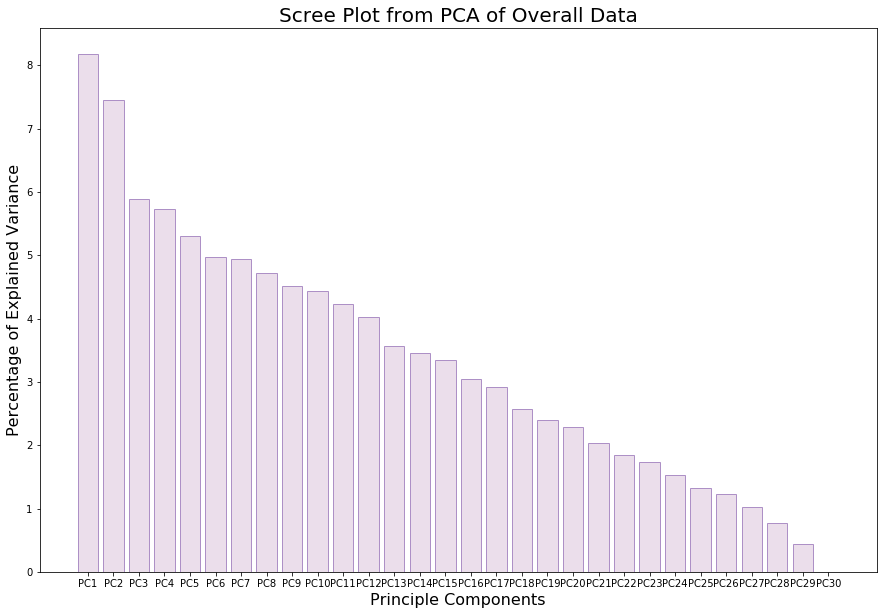

In [53]:
#Make Scree Plot of transposed data
#Initialize figure
fig = plt.figure(figsize=(15,10))

#Plot histogram
plt.bar(x = range(1, len(var_exp) + 1), height = var_exp, tick_label = col_labels, color = 'thistle', edgecolor = 'rebeccapurple', alpha=0.5)

#Titles and lables
plt.ylabel('Percentage of Explained Variance', fontsize=16)
plt.xlabel('Principle Components', fontsize=16)
plt.title("Scree Plot from PCA of Overall Data (Transposed)", fontsize=20)

plt.show()

In [54]:
#Run PCA with data not transposed
#Center and scale data
oad_scaledforpca2 = preprocessing.scale(oad_cleaned)

#Make PCA object
pca2 = PCA()

#Fit and scale PCA data
pca2.fit(oad_scaledforpca2)
pca_data2 = pca2.transform(oad_scaledforpca2)

#Generate values for scree plot (variance explained) and save to csv file
var_exp2 = np.round(pca2.explained_variance_ratio_*100, decimals=2)
var_exp2.tofile('Explained_Variance_of_Overall.csv')

#Create scree list and append
scree_list2 = []
scree_list2.append(var_exp2)

#Label columns
col_labels2 = ['PC' + str(x) for x in range(1, len(var_exp) + 1)]

#Generate new dataframe of PCA principal components and save to csv file
pca_df2 = pd.DataFrame(pca_data2, columns = col_labels2)
pca_df2.to_csv('PCA1_of_Overall_Data')
pca_df2.head()

C:\Users\Meenakshi Krishnan\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,45.679620,-25.407040,-1.389159,-3.849059,4.699135,1.114343,-0.682810,0.176589,-0.263292,-0.001507,...,0.002642,0.000185,0.001076,-0.001284,-0.000397,0.000857,0.000394,-0.000244,-0.000225,0.000046
1,35.297139,28.569831,-10.462378,-1.665631,-4.784779,-0.874524,0.324282,-0.501402,0.155096,-0.038105,...,-0.005689,-0.001528,-0.003830,0.001540,-0.000409,-0.000199,-0.000268,-0.000044,0.000058,-0.000067
2,16.974071,16.472947,22.449593,-1.357360,1.696772,0.558027,-0.121207,0.295897,-0.043023,-0.111413,...,0.000965,-0.000813,0.000581,0.000218,-0.000865,0.000438,-0.000409,0.000038,0.000076,0.000032
3,12.683606,-12.980649,4.722899,11.849319,-9.819517,-3.242744,-1.891397,-0.215673,0.123894,-0.041837,...,-0.002092,0.004637,-0.000255,0.004818,0.000409,-0.003437,-0.001034,-0.003157,0.001817,-0.000091
4,5.632669,9.650041,-3.782839,14.237063,9.827090,0.899413,-0.304533,0.339625,-0.118998,-0.185278,...,-0.000585,-0.002187,-0.003213,0.000246,0.000222,0.000519,-0.001088,-0.000429,-0.000138,0.000082


In [57]:
#Convert from a np.array to df
scree2 = np.array(scree_list2)
scree2 = pd.DataFrame(scree2)
scree2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,51.46,26.76,8.68,5.0,3.49,2.32,1.24,0.45,0.21,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


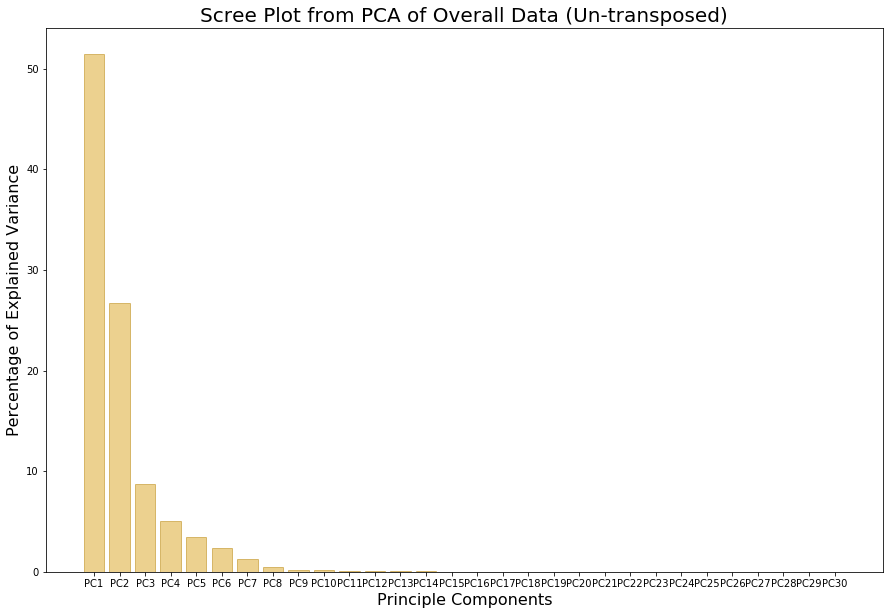

In [60]:
#Make Scree Plot of non-transposed data
#Initialize figure
fig2 = plt.figure(figsize=(15,10))

#Plot histogram
plt.bar(x = range(1, len(var_exp2) + 1), height = var_exp2, tick_label = col_labels2, color = 'goldenrod', edgecolor = 'darkgoldenrod', alpha=0.5)

#Titles and lables
plt.ylabel('Percentage of Explained Variance', fontsize=16)
plt.xlabel('Principle Components', fontsize=16)
plt.title("Scree Plot from PCA of Overall Data (Un-transposed)", fontsize=20)

plt.show()